In [1]:
# Imports
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession


In [2]:
# Criando o Spark Context
sc = SparkContext(appName = "us_retail_sales")

In [3]:
# Cria a sessão
spark = SparkSession.builder.getOrCreate()

In [4]:
spark

In [5]:
# Nome do arquivo
arquivo = 'D:/Programacao_SQL/Codigos/us_retail_sales/us_retail_sales.csv'

In [6]:
# Carrega como dataframe do Spark
# Não usaremos Pandas pois não vamos fazer análise exploratória de dados
df = spark.read.csv(arquivo, header = True)

In [7]:
type(df)

pyspark.sql.dataframe.DataFrame

In [8]:
df.show(5)

+-----------+----------+--------------------+---------------+-----+
|sales_month|naics_code|    kind_of_business|reason_for_null|sales|
+-----------+----------+--------------------+---------------+-----+
| 1992-01-01|       441|Motor vehicle and...|           null|29811|
| 1992-01-01|      4411|  Automobile dealers|           null|25800|
| 1992-01-01|4411, 4412|Automobile and ot...|           null|26788|
| 1992-01-01|     44111|     New car dealers|           null|24056|
| 1992-01-01|     44112|    Used car dealers|           null| 1744|
+-----------+----------+--------------------+---------------+-----+
only showing top 5 rows



In [9]:
# Cria tabela temporária
df.createOrReplaceTempView("retail_sales")

Visualizando os 5 primeiros registros

In [10]:

spark.sql("SELECT * FROM retail_sales LIMIT 5").show()

+-----------+----------+--------------------+---------------+-----+
|sales_month|naics_code|    kind_of_business|reason_for_null|sales|
+-----------+----------+--------------------+---------------+-----+
| 1992-01-01|       441|Motor vehicle and...|           null|29811|
| 1992-01-01|      4411|  Automobile dealers|           null|25800|
| 1992-01-01|4411, 4412|Automobile and ot...|           null|26788|
| 1992-01-01|     44111|     New car dealers|           null|24056|
| 1992-01-01|     44112|    Used car dealers|           null| 1744|
+-----------+----------+--------------------+---------------+-----+



Descreva todos os tipos de dados da tabela 

In [11]:

spark.sql("DESCRIBE retail_sales").show()

+----------------+---------+-------+
|        col_name|data_type|comment|
+----------------+---------+-------+
|     sales_month|   string|   null|
|      naics_code|   string|   null|
|kind_of_business|   string|   null|
| reason_for_null|   string|   null|
|           sales|   string|   null|
+----------------+---------+-------+



Realizar a contagem de forma descendente de todas as viagens realizadas por destino 

In [12]:

spark.sql(""" SELECT sales_month
                ,sales
                FROM retail_sales
                WHERE kind_of_business = 'Retail and food services sales, total'""").show()

+-----------+------+
|sales_month| sales|
+-----------+------+
| 1992-01-01|146376|
| 1992-02-01|147079|
| 1992-03-01|159336|
| 1992-04-01|163669|
| 1992-05-01|170068|
| 1992-06-01|168663|
| 1992-07-01|169890|
| 1992-08-01|170364|
| 1992-09-01|164617|
| 1992-10-01|173655|
| 1992-11-01|171547|
| 1992-12-01|208838|
| 1993-01-01|153221|
| 1993-02-01|150087|
| 1993-03-01|170439|
| 1993-04-01|176456|
| 1993-05-01|182231|
| 1993-06-01|181535|
| 1993-07-01|183682|
| 1993-08-01|183318|
+-----------+------+
only showing top 20 rows



In [13]:
df1=spark.sql(""" SELECT CAST (sales_month AS DATE) as sales_month
                , CAST (sales AS INTEGER) as sales
                FROM retail_sales
                WHERE kind_of_business = 'Retail and food services sales, total'""").toPandas()

<AxesSubplot:xlabel='sales_month'>

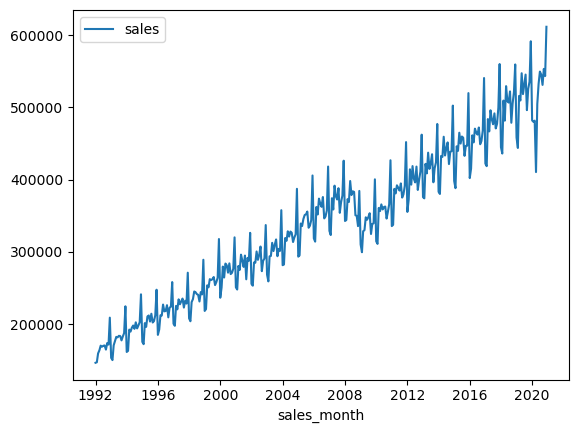

In [14]:
df1.plot(kind='line',x='sales_month',y='sales')

In [15]:
spark.sql("""
          SELECT date_part('year',sales_month) as sales_year
            ,sum(sales) as sales
            FROM retail_sales
            WHERE kind_of_business = 'Retail and food services sales, total'
            GROUP BY 1
          """ ).show()

+----------+---------+
|sales_year|    sales|
+----------+---------+
|      2003|3612457.0|
|      2007|4439733.0|
|      2018|6001623.0|
|      2015|5349487.0|
|      2006|4294359.0|
|      2013|5001763.0|
|      1997|2726131.0|
|      1994|2330235.0|
|      2014|5215656.0|
|      2019|6218002.0|
|      2004|3846605.0|
|      1996|2603794.0|
|      1998|2852956.0|
|      2020|6224399.0|
|      2012|4826390.0|
|      2009|4064476.0|
|      2016|5510186.0|
|      1995|2450628.0|
|      2001|3378906.0|
|      1992|2014102.0|
+----------+---------+
only showing top 20 rows



In [16]:
df2=spark.sql("""
          SELECT date_part('year',sales_month) as sales_year
            ,sum(sales) as sales
            FROM retail_sales
            WHERE kind_of_business = 'Retail and food services sales, total'
            GROUP BY 1
          """ ).toPandas()

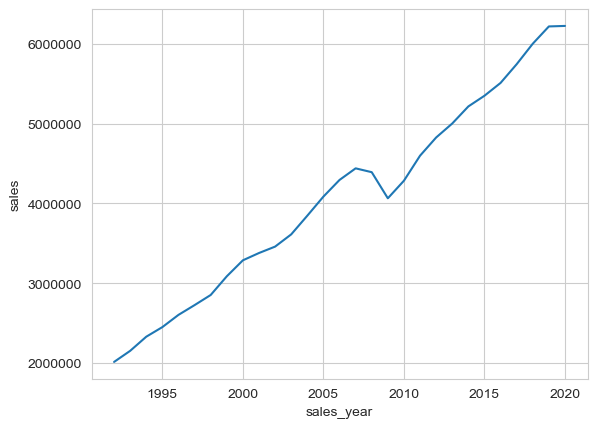

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots()

sns.lineplot(data=df2, x='sales_year',y='sales' )

ax.ticklabel_format(axis="y", style="plain", useOffset=False)

plt.show()

In [18]:
spark.sql("""
          SELECT date_part('year',sales_month) as sales_year
        ,kind_of_business
        ,sum(sales) as sales
        FROM retail_sales
        WHERE kind_of_business in ('Book stores'
        ,'Sporting goods stores','Hobby, toy, and game stores')
        GROUP BY 1,2
""").show()

+----------+--------------------+-------+
|sales_year|    kind_of_business|  sales|
+----------+--------------------+-------+
|      2006|         Book stores|16978.0|
|      1993|Hobby, toy, and g...|11651.0|
|      2003|Sporting goods st...|27000.0|
|      2008|         Book stores|16801.0|
|      1997|Sporting goods st...|21167.0|
|      1997|         Book stores|12742.0|
|      2013|         Book stores|11489.0|
|      2005|         Book stores|16992.0|
|      2009|         Book stores|15802.0|
|      2014|         Book stores|11325.0|
|      2002|         Book stores|15437.0|
|      2020|Hobby, toy, and g...|17287.0|
|      2012|Sporting goods st...|42142.0|
|      2015|         Book stores|10998.0|
|      2007|         Book stores|17171.0|
|      1998|Hobby, toy, and g...|15833.0|
|      1999|Sporting goods st...|23699.0|
|      2011|         Book stores|13716.0|
|      2016|Sporting goods st...|47290.0|
|      2018|         Book stores| 9617.0|
+----------+--------------------+-

In [19]:
df3=spark.sql("""
          SELECT date_part('year',sales_month) as sales_year
        ,kind_of_business
        ,sum(sales) as sales
        FROM retail_sales
        WHERE kind_of_business in ('Book stores'
        ,'Sporting goods stores','Hobby, toy, and game stores')
        GROUP BY 1,2
""").toPandas()

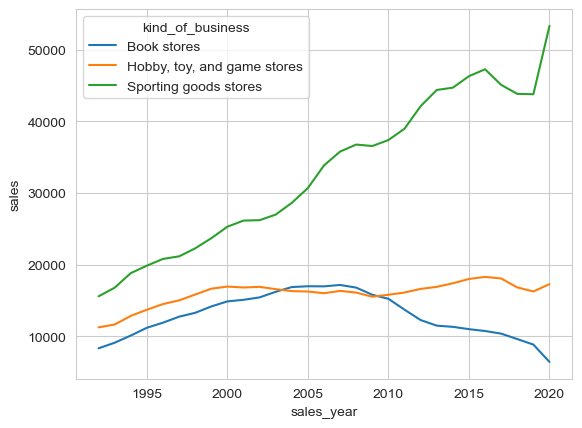

In [20]:
sns.lineplot(x="sales_year", y="sales", hue="kind_of_business", data=df3)
plt.show()

In [21]:
spark.sql(""" SELECT sales_month
            ,kind_of_business
            ,sales
            FROM retail_sales
            WHERE kind_of_business IN( "Women's clothing stores","Women's clothing stores")
""").show()

+-----------+--------------------+-----+
|sales_month|    kind_of_business|sales|
+-----------+--------------------+-----+
| 1992-01-01|Women's clothing ...| 1873|
| 1992-02-01|Women's clothing ...| 1991|
| 1992-03-01|Women's clothing ...| 2403|
| 1992-04-01|Women's clothing ...| 2665|
| 1992-05-01|Women's clothing ...| 2752|
| 1992-06-01|Women's clothing ...| 2424|
| 1992-07-01|Women's clothing ...| 2373|
| 1992-08-01|Women's clothing ...| 2657|
| 1992-09-01|Women's clothing ...| 2560|
| 1992-10-01|Women's clothing ...| 2755|
| 1992-11-01|Women's clothing ...| 2946|
| 1992-12-01|Women's clothing ...| 4416|
| 1993-01-01|Women's clothing ...| 2123|
| 1993-02-01|Women's clothing ...| 2005|
| 1993-03-01|Women's clothing ...| 2442|
| 1993-04-01|Women's clothing ...| 2762|
| 1993-05-01|Women's clothing ...| 2873|
| 1993-06-01|Women's clothing ...| 2552|
| 1993-07-01|Women's clothing ...| 2539|
| 1993-08-01|Women's clothing ...| 2626|
+-----------+--------------------+-----+
only showing top

In [22]:
df4=spark.sql(""" SELECT CAST (sales_month AS DATE) as sales_month
            ,kind_of_business
            ,CAST (sales AS INTEGER) AS sales
            FROM retail_sales
            WHERE kind_of_business IN( "Men's clothing stores","Women's clothing stores")
""").toPandas()

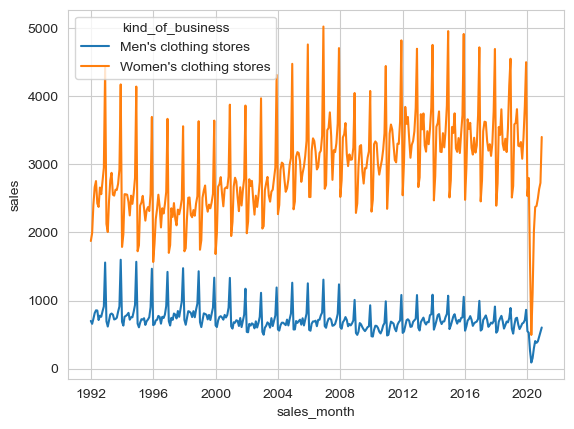

In [23]:
sns.lineplot(x="sales_month", y="sales", hue="kind_of_business", data=df4)
plt.show()

In [24]:
spark.sql(""" SELECT 
            sales_month, 
            kind_of_business, 
            sales,
            sum(sales) over (partition by sales_month) as total_sales,
            sales * 100 / sum(sales) over (partition by sales_month) as pct_total
            FROM retail_sales
            WHERE kind_of_business in ("Men's clothing stores","Women's clothing stores")
        """).show()

+-----------+--------------------+-----+-----------+------------------+
|sales_month|    kind_of_business|sales|total_sales|         pct_total|
+-----------+--------------------+-----+-----------+------------------+
| 1992-01-01|Men's clothing st...|  701|     2574.0|27.233877233877234|
| 1992-01-01|Women's clothing ...| 1873|     2574.0| 72.76612276612276|
| 1992-02-01|Men's clothing st...|  658|     2649.0|24.839562098905247|
| 1992-02-01|Women's clothing ...| 1991|     2649.0| 75.16043790109475|
| 1992-03-01|Men's clothing st...|  731|     3134.0|23.324824505424377|
| 1992-03-01|Women's clothing ...| 2403|     3134.0| 76.67517549457563|
| 1992-04-01|Men's clothing st...|  816|     3481.0| 23.44153978741741|
| 1992-04-01|Women's clothing ...| 2665|     3481.0| 76.55846021258259|
| 1992-05-01|Men's clothing st...|  856|     3608.0|23.725055432372507|
| 1992-05-01|Women's clothing ...| 2752|     3608.0|  76.2749445676275|
| 1992-06-01|Men's clothing st...|  853|     3277.0| 26.02990540

In [25]:
df5=spark.sql(""" SELECT 
            sales_month, 
            kind_of_business, 
            sales,
            sum(sales) over (partition by sales_month) as total_sales,
            sales * 100 / sum(sales) over (partition by sales_month) as pct_total
            FROM retail_sales
            WHERE kind_of_business in ("Men's clothing stores","Women's clothing stores")
        """).toPandas()

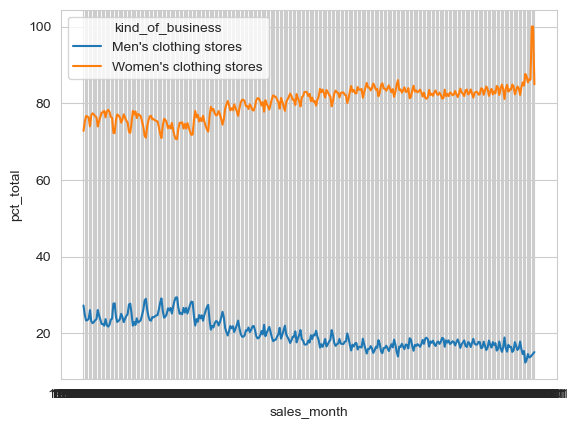

In [26]:
sns.lineplot(x="sales_month", y="pct_total", hue="kind_of_business", data=df5)
plt.show()